In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('../Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
x = df.drop('Sales', axis=1)
y = df['Sales']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)

In [13]:
y_pred

array([16.585975  , 21.21532322, 21.69227359, 10.78721853, 22.24436064,
       13.30628235, 21.2504897 ,  7.35896941, 13.41395576, 15.21479112,
        9.03101674,  6.53873996, 14.38551706,  8.94580619,  9.53158119,
       12.07825531,  8.87587732, 16.23384905, 10.31667839, 18.8497049 ,
       19.79672229, 13.69754141, 12.43554051, 21.57865582,  7.69026184,
        5.68674887, 20.9598931 , 11.90745906,  9.12144274,  8.48517263,
       12.35724077, 10.0227661 , 21.73331021, 12.65125091, 18.23409167,
       20.17501241, 14.19756077, 21.01107333, 10.89474985,  4.43662297,
        9.60216605, 12.49762923, 10.16879519,  8.15899632, 13.32316067,
        5.24178782,  9.33060279, 14.18410081,  8.74319968, 11.67710859,
       15.65671046, 11.72808538, 13.24771147, 11.05045257,  6.41295864,
        9.85860465,  9.4443335 , 24.324371  ,  7.66332787, 12.31212277,
       17.55637468, 15.28145887, 11.4813757 , 11.15185016, 16.6268277 ,
        6.89967715])

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mean_absolute_error(y_test, y_pred)

1.491650950918786

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.9308737486325531

<Axes: xlabel='Sales', ylabel='Sales'>

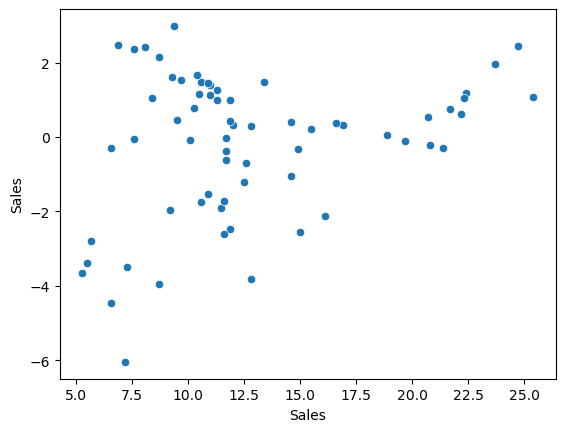

In [20]:
residual = y_test - y_pred
sns.scatterplot(x=y_test, y=residual)


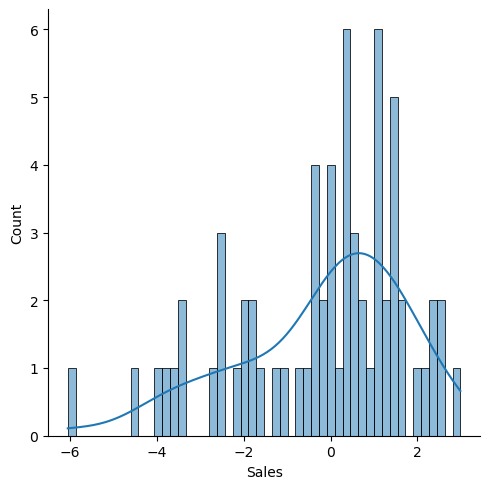

In [21]:
sns.displot(residual,bins=50,kde=True)

In [23]:
model.coef_

array([-0.00037402,  0.044666  ,  0.19662408,  0.00596564])

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
poly_converter.fit(x)

PolynomialFeatures(include_bias=False)

In [27]:
poly_features= poly_converter.transform(x)

In [28]:
poly_features.shape

(200, 14)

In [29]:
model2 = LinearRegression()

In [31]:
model2.fit(poly_features, y)

LinearRegression()

In [33]:
model2.coef_

array([-2.69092066e-03,  5.11911869e-02,  2.21312303e-02,  2.17151363e-03,
        2.51855190e-06,  6.92052232e-06, -5.86288117e-06,  4.21682861e-05,
       -1.10306878e-04,  1.10254228e-03, -4.85560772e-05,  1.23433080e-04,
        8.07146167e-05,  2.26993581e-05])

In [34]:
x.shape

(200, 4)

In [42]:
x

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [43]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64